<a href="https://colab.research.google.com/github/sdasmaha/Projects/blob/main/ashrae_thermal_dataset_cooling_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ashrae-global-thermal-comfort-database-ii/ashrae_db2.01.csv


# <span style='color:	#008080'> **Introduction to Building Cooling Strategy Types** </span>


### In the following notebook, we will be exploring the following question: "What sort of insights can we gain looking at the datasets from building that employs different cooling strategy"
### The purpose of this notebook is to give a basic insight to different ways we can asks question on the dataset <span style="color:red"> depending on the different building cooling strategy </span>

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### There are 4 types of building cooling strategy in the dataset: Mechanically ventilated, Naturally ventilated, Air conditioned and Mixed mode
#### Here are the descriptions and explanation for each of them

### <center><span style='color:		#008080'> **1. Mechanically Ventilated** </span>

#### There are many different types of mechanically ventilated types of buildings but the general properties remain the same. Mechanical ventilation systems circulate air using ducts and fans, rather than relying on airflow through holes or cracks in a home's walls, roof, or windows. It is primarily driven by fan. Important to note: different climate will implement different types of mechanical ventilation.

    
Structure            |  Air ducts
:-------------------------:|:-------------------------:
<img src="https://www.thegreenage.co.uk/wp-content/uploads/2015/10/Mechanical-assisted-night-ventilation.png" alt="drawing" width="300"/>  | <img src="https://www.designingbuildings.co.uk/w/images/f/fa/Ventilation_ductwork.jpg" alt="drawing" width="300"/>
    


### <center><span style='color:	#008080'> **2. Naturally Ventilated** </span>

#### Naturaly ventilated building do not rely on a mechanical system in order to supply and remove air from the building. Depending on the climate, there are many different implementation of naturally ventilated buildings. It relies on pressure difference between outside the building and inside the building in order to drive air into the buildings. These types of buildings tend to save more energy and costs. 


Structure            |  Windows as natural air mechanism
:-------------------------:|:-------------------------:
<img src="https://www.windowmaster.com/admin/public/getimage.ashx?image=/Files/Images/Blandet/vent-opdrift-3D.png&crop=0&Format=png&fix=br&Width=380&" alt="drawing" width="300"/>  | <img src="https://5.imimg.com/data5/JW/CQ/MY-30120033/aluminium-openable-windows-500x500.jpg" alt="drawing" width="300"/>

### <center><span style='color:	#008080'> **3. Air Conditioned** </span>

#### As the name suggest, the air conditioned buildings uses air condition to provide air into the buildings


Structure            |  Air Conditioner on a roof
:-------------------------:|:-------------------------:
<img src="https://i.pinimg.com/564x/26/16/9f/26169f8f6696c7c754fe70dfd8a68210.jpg" alt="drawing" width="300"/>  | <img src="https://www.mckinsey.com/~/media/McKinsey/Industries/Advanced%20Electronics/Our%20Insights/Can%20HVAC%20systems%20help%20prevent%20transmission%20of%20COVID19/HVAC-prevent-transmission-STANDARD-1536x1536.jpg " alt="drawing" width="300"/>

### <center><span style='color:	#008080'> **4. Mixed Mode building** </span>

#### Mixed mode buildings combines natural ventilation and air conditioned/mechanical ventilation system to provide the best of both system. Mixed mode provides more options for buildings residing in four seasons climate. During summer, these buildings can deploy the naturally ventilation to save energy. During winter, they can deploy a mechanically ventilation system to provide heat to the building.


Structure            |  A combination of both types
:-------------------------:|:-------------------------:
<img src="https://cbe.berkeley.edu/mixedmode/images/home/diagram.jpg" alt="drawing" width="300"/>  | <img src="https://www.architectureanddesign.com.au/getattachment/fedbf387-73ee-40e6-b663-e646d49c1ce8/attachment.aspx?width=0&height=0" alt="drawing" width="400"/>


# <span style='color:	#008080'> **Cleaning Data** </span>


### Before we can do snything with the data, we should explore and remove some columns to give a basic understanding of the data

### The following code removes Farenheit data (as they have a 1 - 1 relationship with Celsius data) + Data Contributor and Climate (1 to 1 with Koppen climate classfication).

In [ ]:
raw_data = pd.read_csv('/kaggle/input/ashrae-global-thermal-comfort-database-ii/ashrae_db2.01.csv')
data = raw_data.copy()
drop_col = ['Climate','Publication (Citation)','Data contributor','Operative temperature (F)','Radiant temperature (F)','Globe temperature (F)','Outdoor monthly air temperature (F)','Velocity_l (fpm)','Velocity_m (fpm)','Velocity_h (fpm)','Tg_l (F)','Tg_m (F)','Tg_h (F)','Ta_l (F)','Ta_m (F)','Ta_h (F)','Air temperature (F)','Air velocity (fpm)']
data = data.drop(drop_col,axis=1)
data.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (10,11,13,18,19,34,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Year,Season,Koppen climate classification,City,Country,Building type,Cooling startegy_building level,Cooling startegy_operation mode for MM buildings,Heating strategy_building level,Age,...,Velocity_l (m/s),Subject«s height (cm),Subject«s weight (kg),Blind (curtain),Fan,Window,Door,Heater,Outdoor monthly air temperature (C),Database
0,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,162.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
1,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,154.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
2,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,173.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
3,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,14.0,...,NaN,167.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2
4,2000.0,Summer,Cfa,Tokyo,Japan,Classroom,Air Conditioned,NaN,NaN,15.0,...,NaN,178.0,NaN,NaN,NaN,NaN,NaN,NaN,25.0,Database 2


## <span style='color:	#008080'> **Distribution of variables** </span>


### The first step to approach the question is to gain an understanding on how different building types are distributed in our data

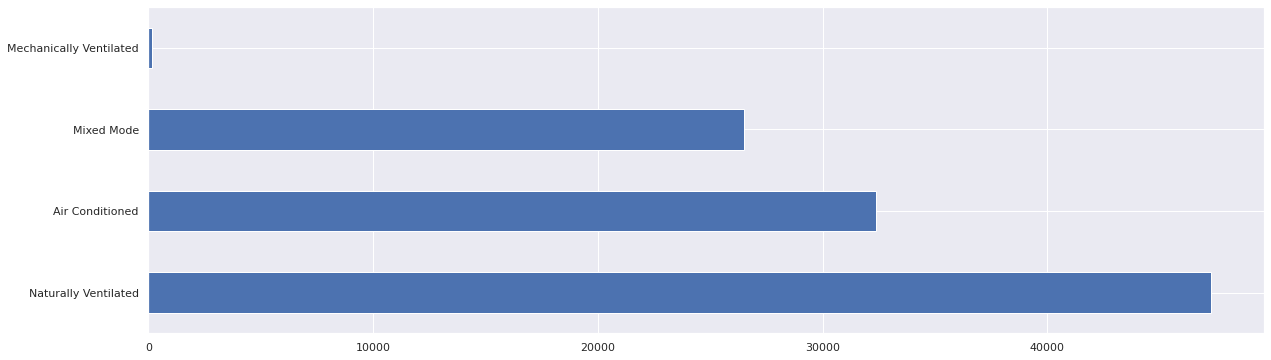

In [ ]:
import seaborn as sns
sns.set()
data['Cooling startegy_building level'].value_counts().plot(kind='barh', figsize=(20,6))

### Next, we look at some of the other variables that could be explored as potential target variables

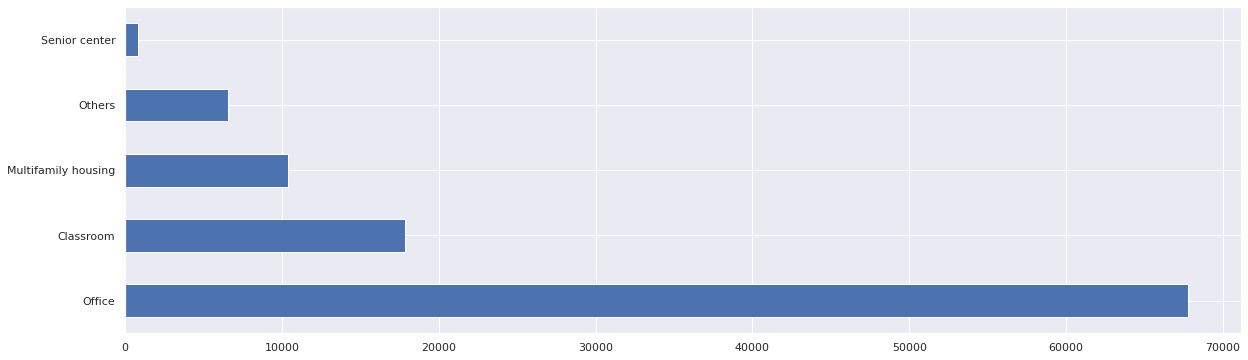

In [ ]:
data['Building type'].value_counts().plot(kind='barh', figsize=(20,6))

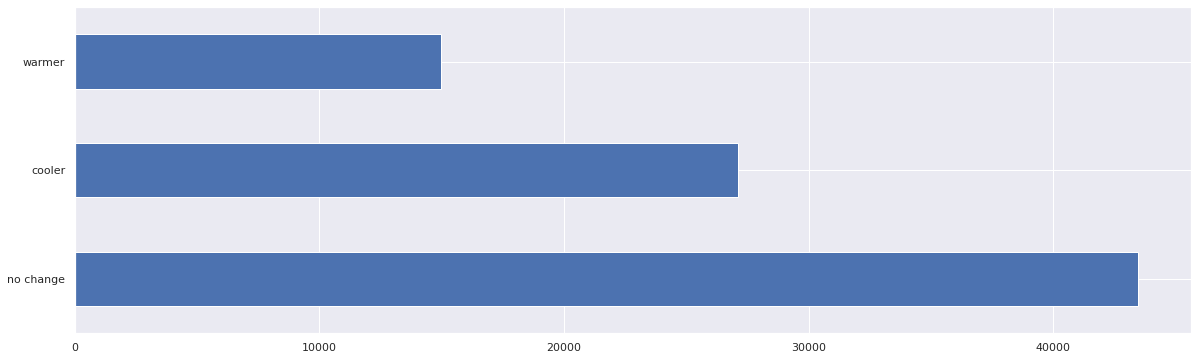

In [ ]:
data['Thermal preference'].value_counts().plot(kind='barh', figsize=(20,6))

### The following code is used to rename columns to provide a better intuition of the data

In [ ]:
data = data.rename(columns={'PMV': 'Predicted Mean Vote', 
                            'PPD': 'Predicted Percentage Disastisfied', 
                            'SET':'Standard Effective Temp', 
                            'CLO': 'Clothing Insulation', 
                            'Ta_h (C)': 'tempfloor_high (C)', 
                            'Ta_m (C)':'tempfloor_med (C)', 
                            'Ta_l (C)':'tempfloor_low (C)', 
                            'Tg_h (C)':'globetemp_high (C)', 
                            'Tg_m (C)':'globetemp_med (C)',
                            'Tg_l (C)':'globetemp_low (C)',
                            'velocity_h (m/s)':'velocity_high (m/s)',
                            'velocity_m (m/s)':'velocity_med (m/s)',
                            'velocity_l (m/s)':'velocity_low (m/s)', 
                            'Cooling startegy_building level':'cooling_strategy_building',
                            'Cooling startegy_operation mode for MM buildings':'cooling_strategy_for_mm_buildings'})
data.columns

Index(['Year', 'Season', 'Koppen climate classification', 'City', 'Country',
       'Building type', 'cooling_strategy_building',
       'cooling_strategy_for_mm_buildings', 'Heating strategy_building level',
       'Age', 'Sex', 'Thermal sensation', 'Thermal sensation acceptability',
       'Thermal preference', 'Air movement acceptability',
       'Air movement preference', 'Thermal comfort', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'activity_10', 'activity_20', 'activity_30', 'activity_60',
       'Air temperature (C)', 'tempfloor_high (C)', 'tempfloor_med (C)',
       'tempfloor_low (C)', 'Operative temperature (C)',
       'Radiant temperature (C)', 'Globe temperature (C)',
       'globetemp_high (C)', 'globetemp_med (C)', 'globetemp_low (C)',
       'Relative humidity (%)', 'Humidity preference', 'Humidity sensation',
       'Air velocity (m/s)', 'Velocity_h (m/s)', 'Velocity_m (m/s)',
       'Velocity_l (m

# <span style='color:#008080'>Decreasing the amount of categories to simplify the data</span>

### Here we generalize the climate columns. There are five general climate classification to be made. This will simplify the model in the case where we will use climate as a variable****






### 1. Tropical
### 2. Dry
### 3. Temperate
### 4. Continental
### 5. Polar
<img src="https://i.pinimg.com/originals/b2/2d/65/b22d6513c9ab215076b43abae105eb07.jpg" alt="drawing" width="600"/> 

### This is good, as it allows us to simplify the columns even further

###  Upon looking at the Koppen Climate Classification abbreviation, one would realize that the first letter of the abbreviation refers to one of the five generalized climate mentioned above. For this reason, we can automate the simplification/generalization process

In [ ]:
data['Koppen climate classification'].isna().sum()

0

In [ ]:
tropical_A = []
dry_B = []
temperate_C = []
continental_D = []
polar_E = []


# Koppen climate classifcation that starts with A always refers to tropical, B refers to dty and so on...
for climate in data['Koppen climate classification'].unique():
    if climate[0] == 'A':
        tropical_A.append(climate)
    elif climate[0] == 'B':
        dry_B.append(climate)
    elif climate[0] == 'C':
        temperate_C.append(climate)
    elif climate[0] == 'D':
        continental_D.append(climate)
    elif climate[0] == 'E':
        polar_E.append(climate)

In [ ]:
print(tropical_A)
print(dry_B)
print(temperate_C)
print(continental_D)
print(polar_E)

['Aw', 'Af', 'Am', 'As']
['BSh', 'BWh', 'BSk']
['Cfa', 'Csb', 'Csa', 'Csc', 'Cfb', 'Cwa', 'Cwb']
['Dwa', 'Dfb']
[]


### Now, we can convert each of the unique values to their generalized forms

In [ ]:
data.loc[data['Koppen climate classification'].isin(tropical_A), 
             'Climate'] = 'Tropical'
data.loc[data['Koppen climate classification'].isin(dry_B), 
             'Climate'] = 'Dry'
data.loc[data['Koppen climate classification'].isin(temperate_C), 
             'Climate'] = 'Temperate'
data.loc[data['Koppen climate classification'].isin(continental_D), 
             'Climate'] = 'Continental'
data.loc[data['Koppen climate classification'].isin(polar_E), 
             'Climate'] = 'Polar'

In [ ]:
data.Climate.value_counts()

Temperate      63657
Tropical       18041
Dry            16295
Continental     9590
Name: Climate, dtype: int64

### Next, we convert any numerical variables that should be Object/Category

In [ ]:
data['Air movement acceptability'] = data['Air movement acceptability'].astype('object')

In [ ]:
data['Thermal sensation acceptability'] = data['Thermal sensation acceptability'].astype('object')

### Here we were able to define a new generalized columns for Climate! Compared to the old climate this classification is a lot more generalized

### After exploring some of the data, it seems that there isn't a lot of things to do with the categorical variable or numerical, so there isn't much we can do there except fixing missing values

# <span style='color:#008080'>Dealing with Missing Values</span>

### We will be using misingno to explore the missing values in the datasets. misingno is a library that allows us to see the number of missing data. In the following code we are going to explore the missing data specifically in the numerical columns and categorical columns. The missing values are represented by white. 

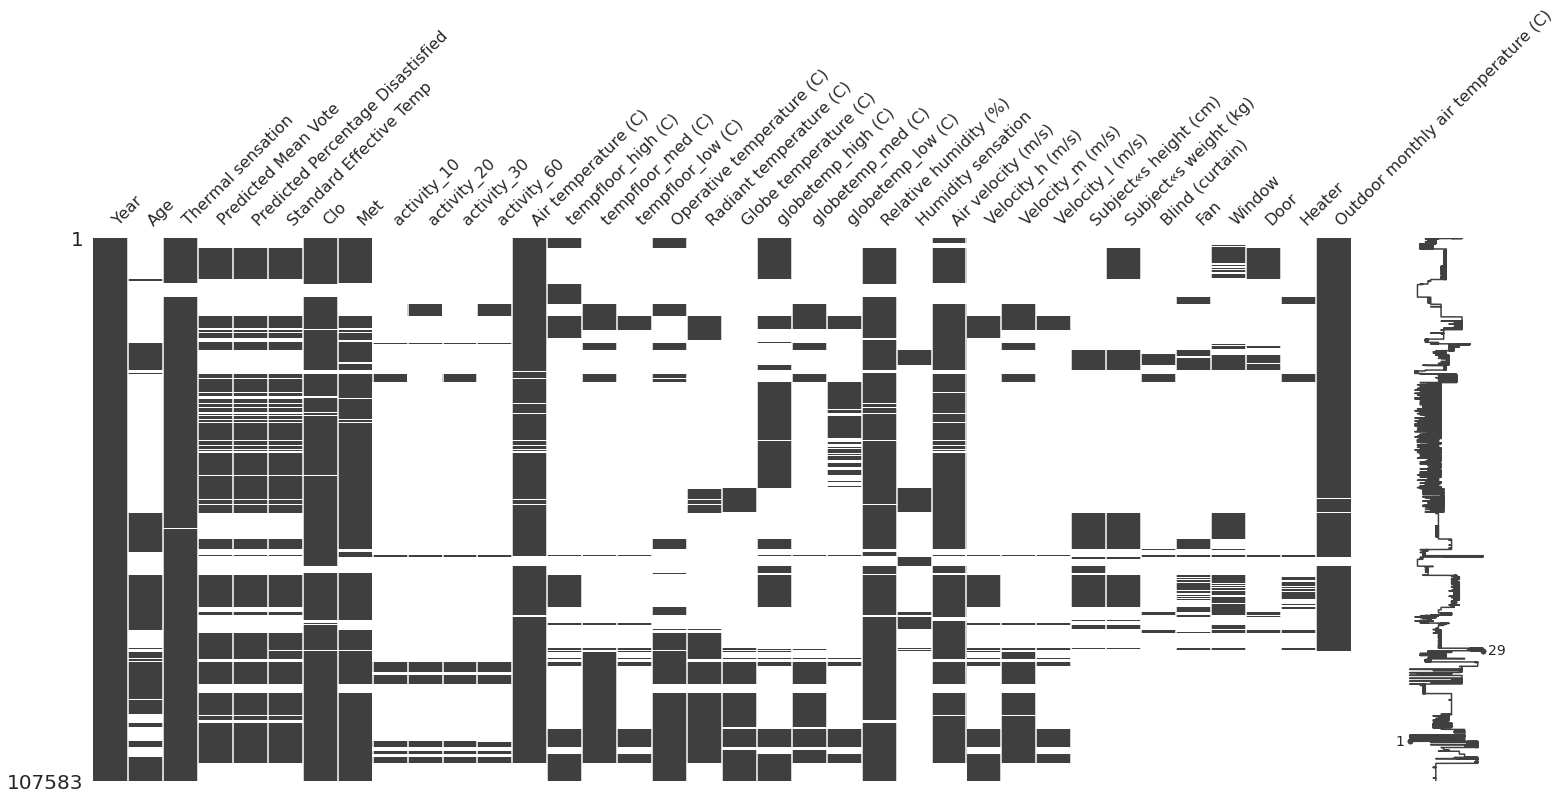

In [ ]:
import missingno as msno

msno.matrix(data.select_dtypes(include='number'));

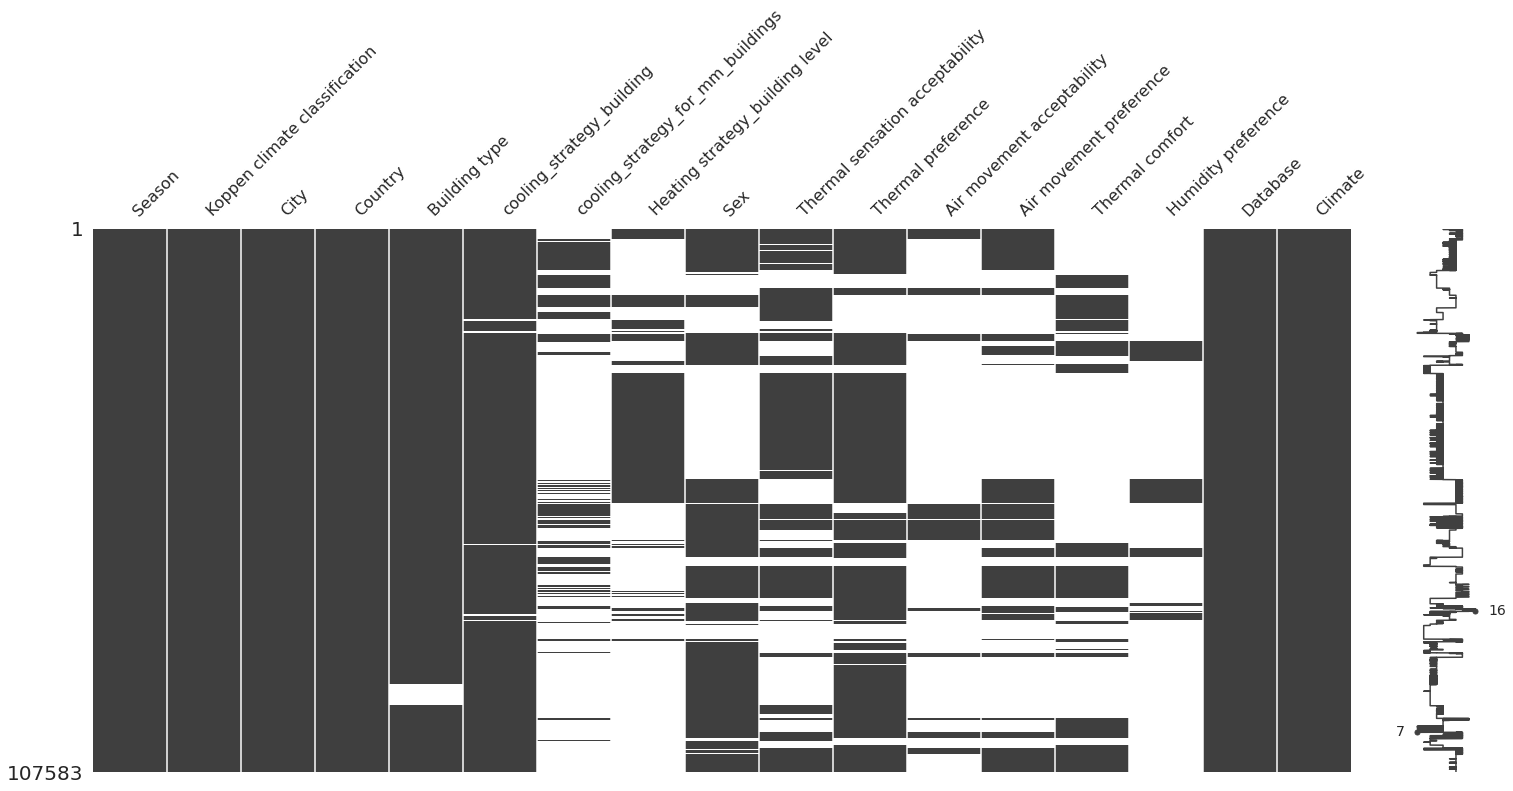

In [ ]:
msno.matrix(data.select_dtypes(include='O'));

### There are a lot of missing values in the data. The first step of our data analysis process is to see whether it's conventional to replace the missing values with the mean/median. 

# <span style='color:#008080'>Segmenting Missing data by buiding's cooling strategy</span>

#### Here, I will segment the data into each building type and see whether missing data are discriminated over a certain building type

In [ ]:
data.cooling_strategy_building.unique()

array(['Air Conditioned', 'Naturally Ventilated', 'Mixed Mode', nan,
       'Mechanically Ventilated'], dtype=object)

In [ ]:
data_mechanical = data[data.cooling_strategy_building == 'Mechanically Ventilated']
data_aircon = data[data.cooling_strategy_building == 'Air Conditioned']
data_natural = data[data.cooling_strategy_building == 'Naturally Ventilated']
data_mm = data[data.cooling_strategy_building == 'Mixed Mode']
data_na = data[data.cooling_strategy_building.isna() == True]

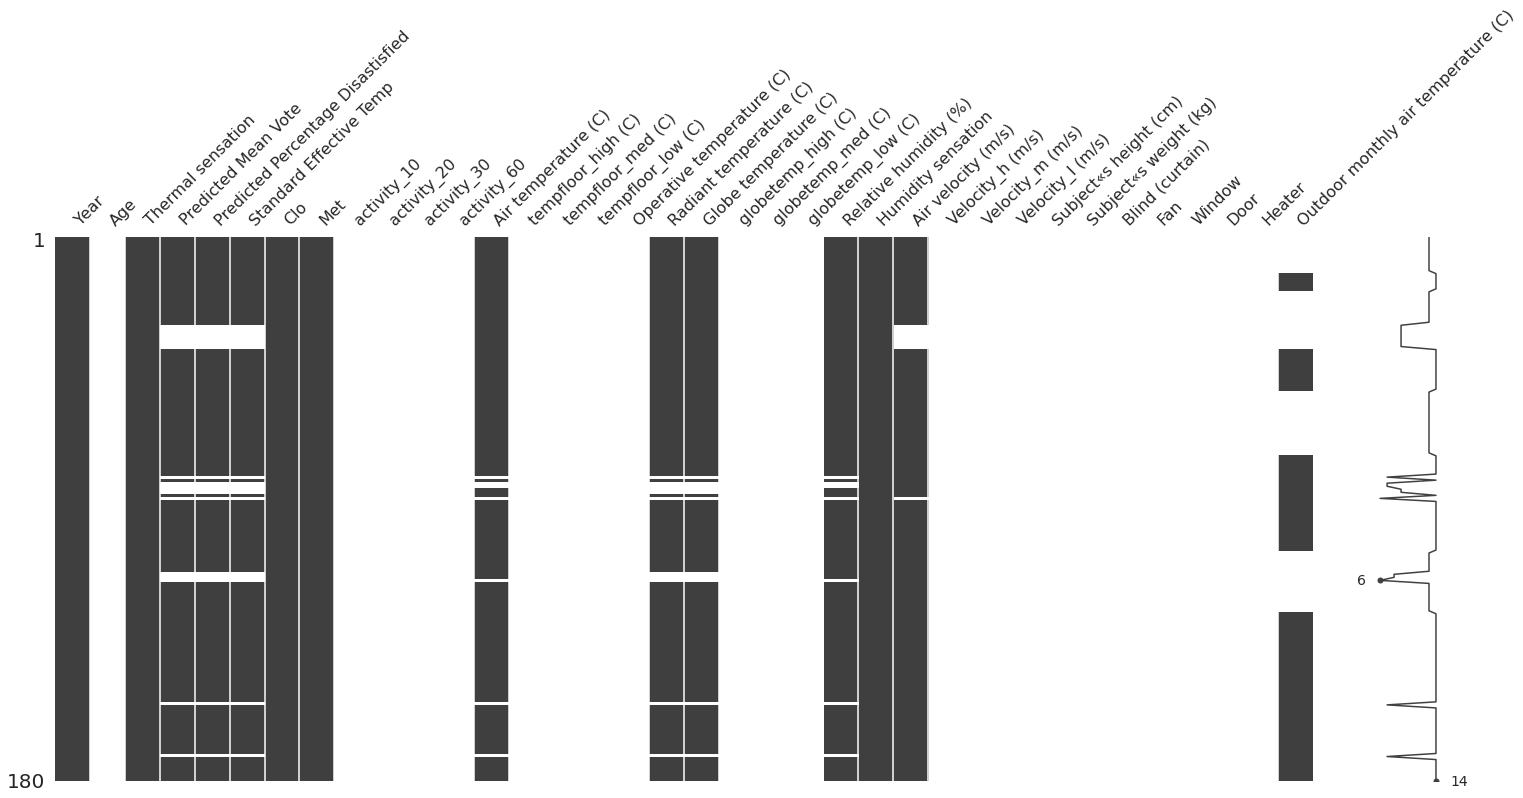

In [ ]:
msno.matrix(data_mechanical.select_dtypes(include='number'))

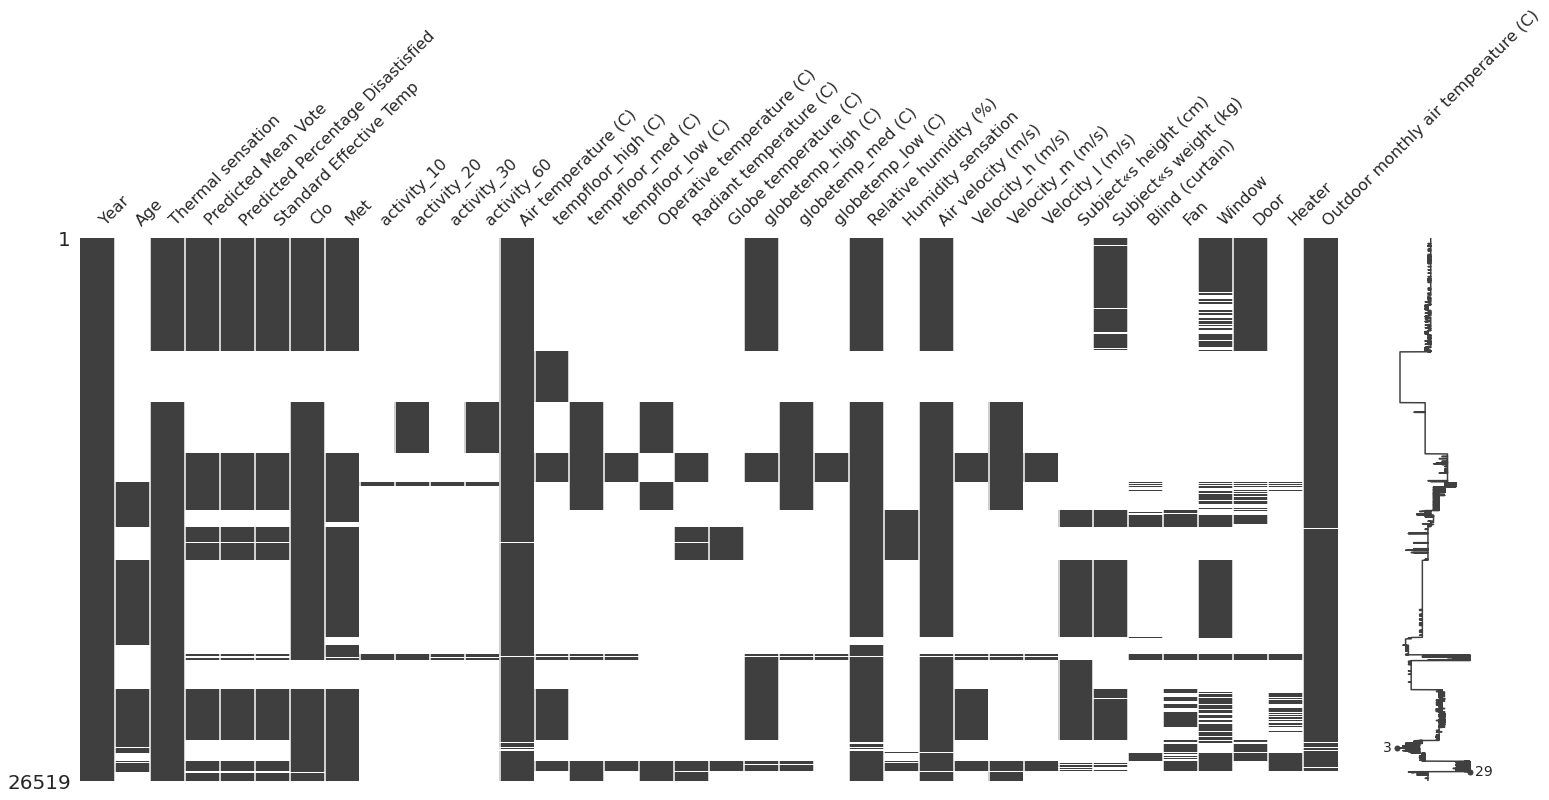

In [ ]:
msno.matrix(data_mm.select_dtypes(include='number'))

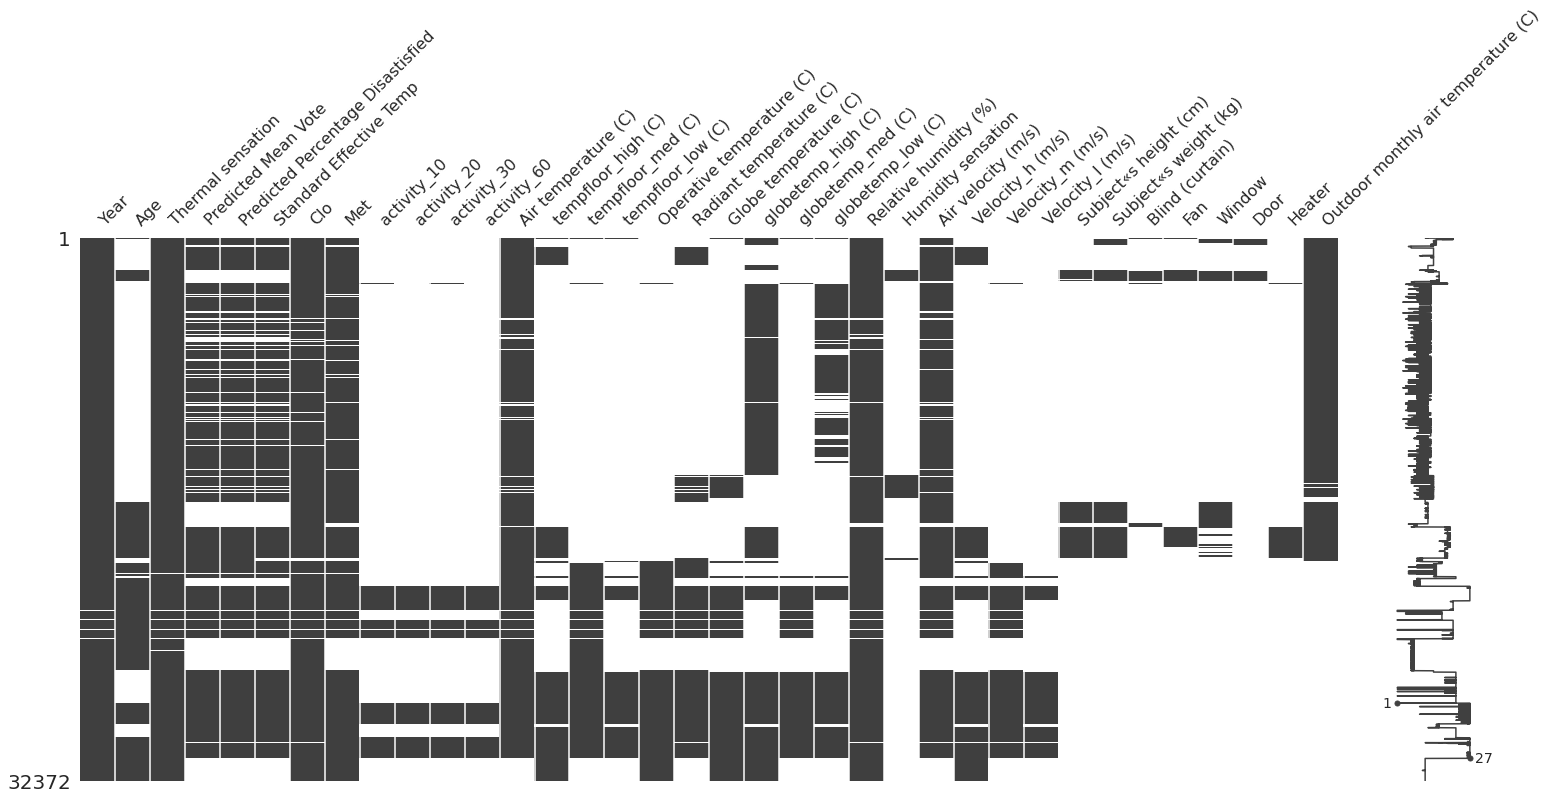

In [ ]:
msno.matrix(data_aircon.select_dtypes(include='number'))

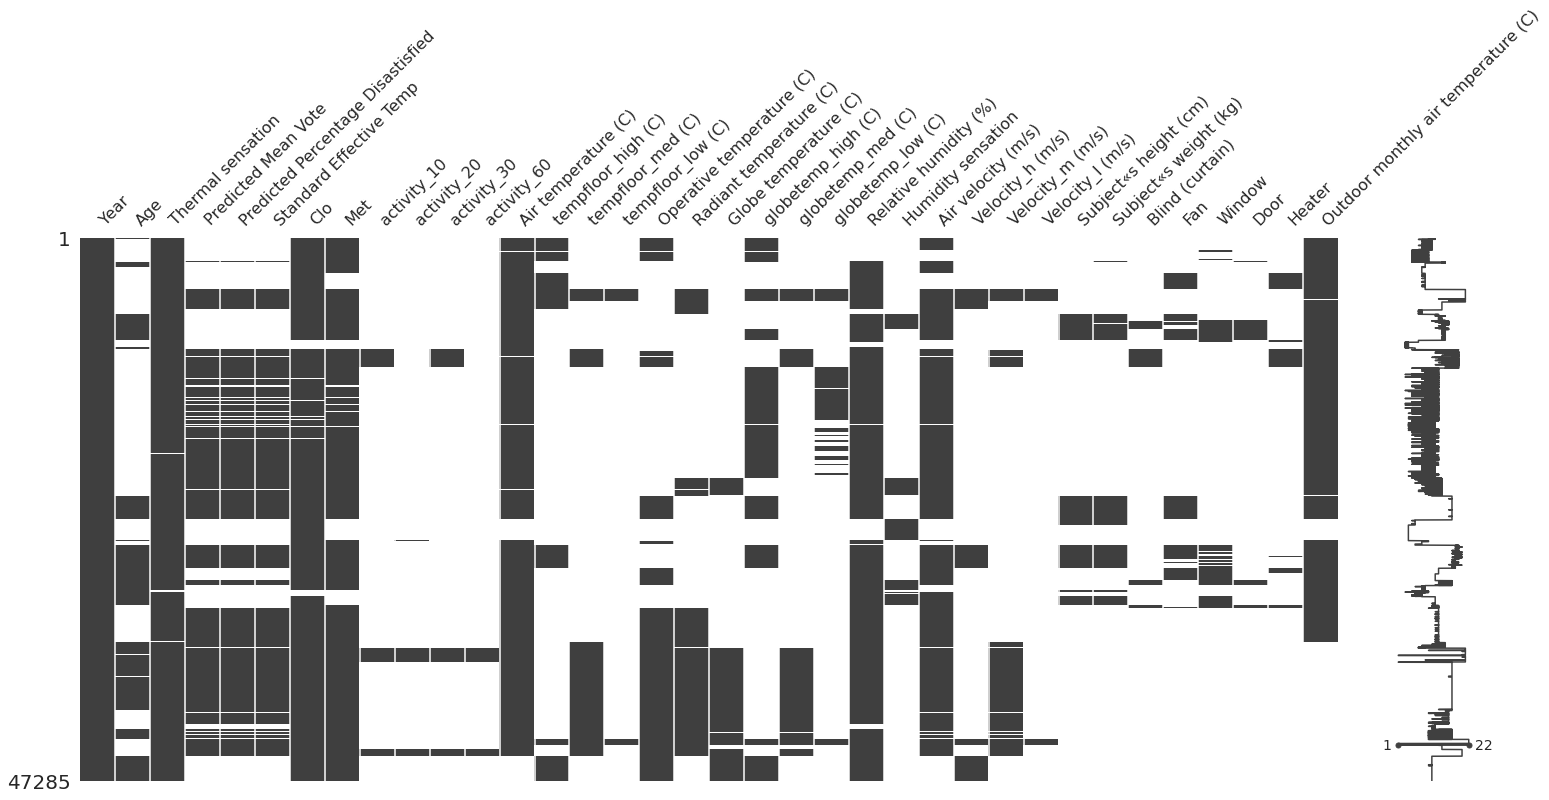

In [ ]:
msno.matrix(data_natural.select_dtypes(include='number'))

### Looking at the data, there are too much columns that we need to remove because it contains too many missing data nad information. For further analysis, perhaps finding these data to use will be better. For now, we will just use what's available and remove the other variables

In [ ]:
keep_col = ['Year', 
            'Thermal sensation', 
            'Predicted Mean Vote', 
            'Predicted Percentage Disastisfied', 
            'Standard Effective Temp', 
            'Clo', 
            'Met', 
            'Air temperature (C)', 
            'Relative humidity (%)', 
            'Air velocity (m/s)', 
            'Outdoor monthly air temperature (C)',
            'Season', 
            'Climate', 
            'City', 
            'Country',
            'Building type', 
            'cooling_strategy_building', 
            'Thermal preference', 
            'Thermal sensation acceptability']

# <span style='color:#008080'>Checking our Data</span>

#### The mechanically ventilated building represents a small sample, some of the data that are missing in some columns exists in others

In [ ]:
# We are going to use this variable
data_no_na = data[keep_col]

In [ ]:
data_no_na.select_dtypes(include='number').columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)'],
      dtype='object')

In [ ]:
data_no_na.select_dtypes(include='O').columns

Index(['Season', 'Climate', 'City', 'Country', 'Building type',
       'cooling_strategy_building', 'Thermal preference',
       'Thermal sensation acceptability'],
      dtype='object')

### Now, we look at variables I believe are aceptable to fill it's gap (Fill it's missing valus using SimpleImputer and such)

## <span style='color:#008080'>Clothing Insulation (CLO)</span>

In [ ]:
print('mean: ' + str(data_no_na['Clo'].mean()))
print('median: '+ str(data_no_na['Clo'].median()))

mean: 0.6736686633956129
median: 0.63


In [ ]:
data_no_na['Clo'].describe()

count    99663.000000
mean         0.673669
std          0.287622
min          0.000000
25%          0.490000
50%          0.630000
75%          0.780000
max          2.890000
Name: Clo, dtype: float64

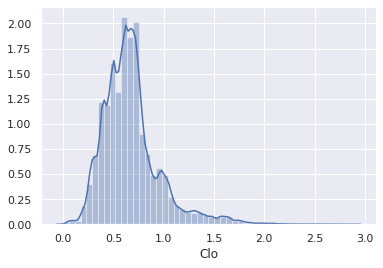

In [ ]:
sns.distplot(data_no_na['Clo'])

In [ ]:
data_no_na['Clo'] = data_no_na['Clo'].fillna(data_no_na['Clo'].mean())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Here, we change CLO because it's not an important variable and the data seems normally distributed

## <span style='color:#008080'>MET (Average Metabolic Rate)</span>

In [ ]:
print('mean: ' + str(data_no_na['Met'].mean()))
print('median: '+ str(data_no_na['Met'].median()))

mean: 1.20662637277536
median: 1.2


In [ ]:
data_no_na['Met'].describe()

count    90419.000000
mean         1.206626
std          0.248939
min          0.650000
25%          1.060000
50%          1.200000
75%          1.200000
max          6.830000
Name: Met, dtype: float64

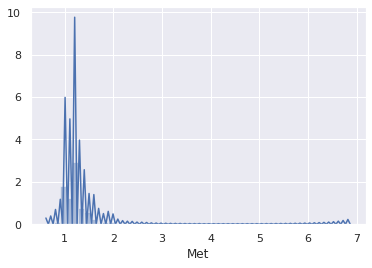

In [ ]:
sns.distplot(data_no_na['Met'])

In [ ]:
data_no_na['Met'] = data_no_na['Met'].fillna(data_no_na['Met'].median())

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### The following data should be fine as we are assuming most of the people have the average metabolismic rate (here we use median to avoid outliers)

In [ ]:
data_simple = data_no_na.copy()

In [ ]:
data_simple = data_simple.dropna()

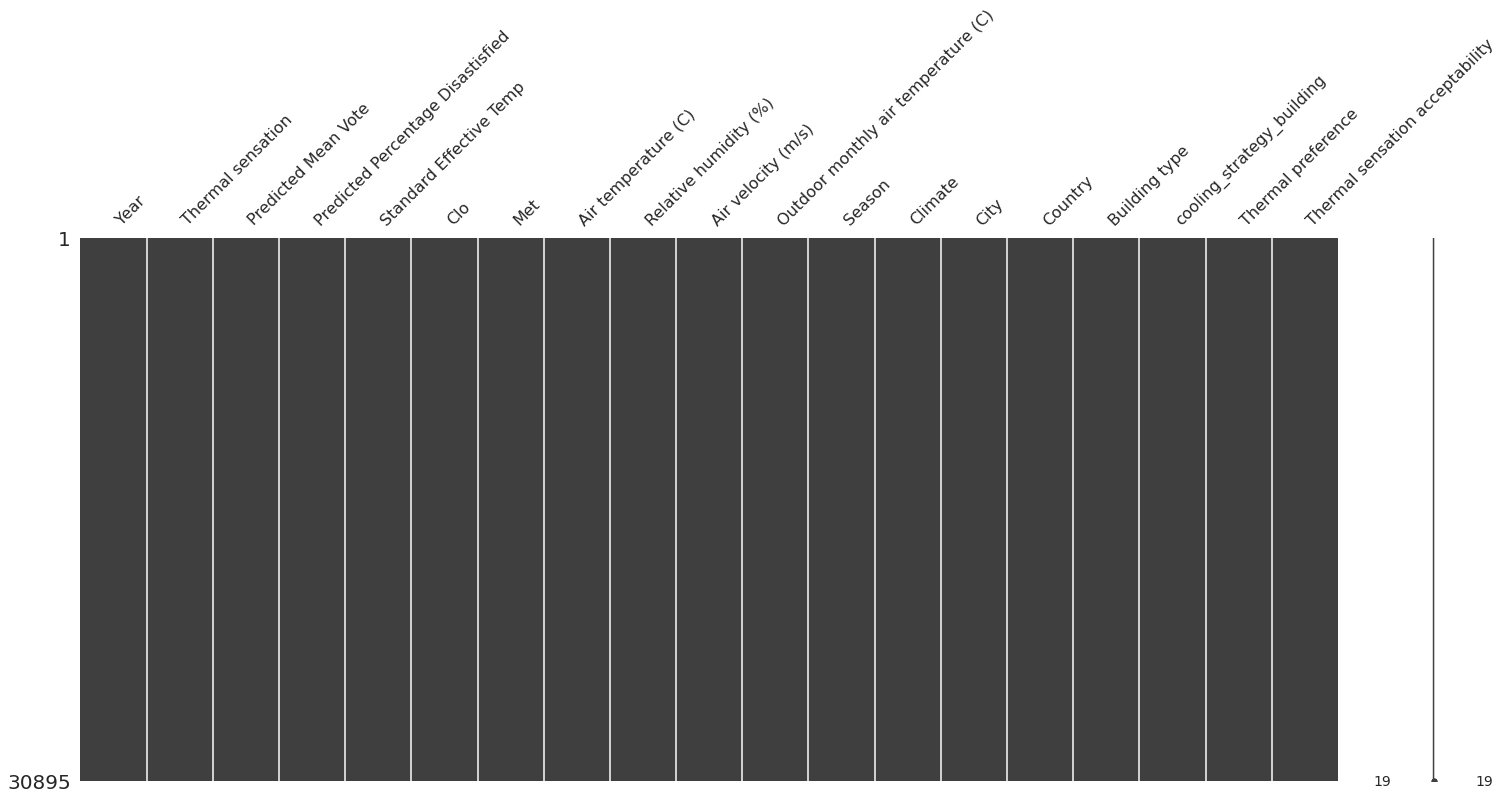

In [ ]:
msno.matrix(data_simple)

In [ ]:
data_simple.cooling_strategy_building.unique()

array(['Air Conditioned', 'Mixed Mode', 'Naturally Ventilated'],
      dtype=object)

### NOTE: We lost the mechanically ventilated values but it only constitute of a small sample size, so we're fine with that

# <span style='color:#008080'>Categorical Variables</span>

### Now, we are going to modify the categorical variable to OneHotEncode them

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
object_cols = ['Season','Climate','Building type','Thermal sensation acceptability','Thermal preference']

In [ ]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_simple[object_cols]))
OH_cols.index = data_simple.index
column_name = OH_encoder.get_feature_names(object_cols)
OH_cols.columns = column_name

In [ ]:
OH_cols

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter,Climate_Dry,Climate_Temperate,Climate_Tropical,Building type_Office,Thermal sensation acceptability_0.0,Thermal sensation acceptability_1.0,Thermal preference_cooler,Thermal preference_no change,Thermal preference_warmer
74,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
75,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
77,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
78,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73160,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
73161,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73162,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73163,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [ ]:
data_simple.select_dtypes(include="O").columns

Index(['Season', 'Climate', 'City', 'Country', 'Building type',
       'cooling_strategy_building', 'Thermal preference',
       'Thermal sensation acceptability'],
      dtype='object')

In [ ]:
# Get list of categorical variables
object_cols = ['Season','Climate','Building type','Thermal sensation acceptability','Thermal preference']
data_simple
other_data = data_simple.drop(object_cols, axis=1)
OH_data = pd.concat([other_data, OH_cols], axis=1)

In [ ]:
OH_data

,Year,Thermal sensation,Predicted Mean Vote,Predicted Percentage Disastisfied,Standard Effective Temp,Clo,Met,Air temperature (C),Relative humidity (%),Air velocity (m/s),...,Season_Winter,Climate_Dry,Climate_Temperate,Climate_Tropical,Building type_Office,Thermal sensation acceptability_0.0,Thermal sensation acceptability_1.0,Thermal preference_cooler,Thermal preference_no change,Thermal preference_warmer
74,2011.0,-1.3,-1.1,32.0,22.20,0.57,1.0,24.3,36.8,0.27,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
75,2011.0,-1.4,-0.1,5.0,24.45,0.57,1.1,25.7,33.1,0.09,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
76,2011.0,0.6,-0.4,8.0,23.74,0.57,1.1,24.6,34.9,0.06,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
77,2011.0,0.5,-0.3,7.0,24.49,0.57,1.0,26.4,31.7,0.13,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
78,2011.0,1.6,-0.4,9.0,23.90,0.57,1.0,25.0,33.3,0.07,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73160,2012.0,0.0,-0.2,6.0,25.74,1.65,1.3,16.7,19.0,0.03,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
73161,2012.0,0.0,-0.5,10.0,23.80,1.07,1.4,16.8,19.1,0.10,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73162,2012.0,0.0,-0.4,8.0,24.51,1.29,1.3,17.3,17.2,0.11,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
73163,2012.0,-1.0,-0.8,17.0,22.34,1.06,1.4,15.6,17.6,0.09,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


# <span style='color:#008080'>Group By</span>

### Here, the group by method is used to provide more insight on the data and from here on, you can do a lot more with the data with more columns!

In [ ]:
OH_data.columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)', 'City',
       'Country', 'cooling_strategy_building', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Climate_Dry',
       'Climate_Temperate', 'Climate_Tropical', 'Building type_Office',
       'Thermal sensation acceptability_0.0',
       'Thermal sensation acceptability_1.0', 'Thermal preference_cooler',
       'Thermal preference_no change', 'Thermal preference_warmer'],
      dtype='object')

In [ ]:
columns = OH_data.select_dtypes(include='number').drop('Year',axis=1).columns

data_grouped = OH_data.groupby(['cooling_strategy_building','Year'])[columns].mean()

In [ ]:
data_grouped

Thermal sensation  Predicted Mean Vote  \
cooling_strategy_building Year                                             
Air Conditioned           1995.0           0.295204             0.046879   
                          1996.0           0.418375            -0.023251   
                          2003.0          -1.036232            -0.122464   
                          2011.0          -0.294521            -0.535616   
                          2012.0           0.082188             0.576311   
Mixed Mode                2009.0           0.239696            -0.417018   
                          2010.0           0.442140            -0.265552   
                          2012.0           0.085308             0.685453   
Naturally Ventilated      1995.0          -0.018921            -0.162056   
                          1996.0           0.217976             0.058976   
                          2012.0           0.198280             0.882848   

                                  Predicted Percentage Disastisfied  \
cooling_strategy_building Year                                        
Air Conditioned           1995.0                          11.409593   
                          1996.0                          11.122497   
                          2003.0                          11.181159   
                          2011.0                          15.484384   
                          2012.0                          17.839964   
Mixed Mode                2009.0                          16.150313   
                          2010.0                          11.120401   
                          2012.0                          23.717486   
Naturally Ventilated      1995.0                          11.790846   
                          1996.0                          10.398943   
                          2012.0                          32.406116   

                                  Standard Effective Temp       Clo       Met  \
cooling_strategy_building Year                                                  
Air Conditioned           1995.0                25.596522  0.762523  1.267209   
                          1996.0                25.344530  0.776363  1.269423   
                          2003.0                24.894203  0.649203  1.283333   
                          2011.0                23.688082  0.589178  1.115068   
                          2012.0                27.568106  0.725764  1.209539   
Mixed Mode                2009.0                23.850665  0.570836  1.230437   
                          2010.0                24.259331  0.475886  1.199331   
                          2012.0                27.430441  0.741045  1.074832   
Naturally Ventilated      1995.0                24.925781  0.841621  1.250192   
                          1996.0                25.584614  0.749305  1.252151   
                          2012.0                28.279885  0.794682  1.218968   

                                  Air temperature (C)  Relative humidity (%)  \
cooling_strategy_building Year                                                 
Air Conditioned           1995.0            23.279530              35.965503   
                          1996.0            23.080801              34.239458   
                          2003.0            23.751449              47.352899   
                          2011.0            24.312329              38.900000   
                          2012.0            25.520886              56.882324   
Mixed Mode                2009.0            22.951377              49.585090   
                          2010.0            24.082943              60.765886   
                          2012.0            26.695256              49.195757   
Naturally Ventilated      1995.0            22.272411              34.256993   
                          1996.0            23.500889              38.487311   
                          2012.0            26.399666              52.967129   

                          

# <span style='color:#008080'>Simple Model</span>

### At the very basics, I will make a cluster model to predict the building's cooling strategy given the input parameters

In [ ]:
OH_data.dtypes

Year                                   float64
Thermal sensation                      float64
Predicted Mean Vote                    float64
Predicted Percentage Disastisfied      float64
Standard Effective Temp                float64
Clo                                    float64
Met                                    float64
Air temperature (C)                    float64
Relative humidity (%)                  float64
Air velocity (m/s)                     float64
Outdoor monthly air temperature (C)    float64
City                                    object
Country                                 object
cooling_strategy_building               object
Season_Autumn                          float64
Season_Spring                          float64
Season_Summer                          float64
Season_Winter                          float64
Climate_Dry                            float64
Climate_Temperate                      float64
Climate_Tropical                       float64
Building type

In [ ]:
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Air Conditioned', 1)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Mixed Mode', 2)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.replace('Naturally Ventilated', 3)
OH_data.cooling_strategy_building = OH_data.cooling_strategy_building.astype('float64')

### Reminder: 
### - 1 -> Air Conditioned, 
### - 2 -> Mixed Mode 
### - 3 -> Naturally Ventilated

In [ ]:
from sklearn.model_selection import train_test_split

train_columns = OH_data.drop(['City', 'Country','cooling_strategy_building'], axis=1).columns

OH_data.cooling_strategy_building

X_train, X_test, y_train, y_test = train_test_split(OH_data[train_columns], OH_data.cooling_strategy_building, test_size=0.33, random_state=42)

In [ ]:
from sklearn.cluster import KMeans

# We know beforehand that we have three class
kmeans = KMeans(n_clusters=3, random_state=0).fit(X_train)

In [ ]:
predictions = kmeans.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,predictions )

0.22416541861925696

In [ ]:
kmeans.inertia_

5648885.262602822

### Our model does not do well with train data, we can expect worse performance on training data

In [ ]:
predictions_test = kmeans.predict(X_test)

In [ ]:
accuracy_score(y_test,predictions_test)

0.22204786190663006

# <span style='color:#008080'>External Evaluation Metrics</span>

- **Homogeneity**: How alike are all the data-points in a cluster (i.e. do they all have the same true cluster label). In general we want clusters that are as homogenous as possible.
- **Completeness**: For a given true label (i.e. sports news) completeness indicates how much of the data points with that label are in the same cluster. For example, if we just put all our data in the same cluster, we'd have a completeness of 1.
- **V-Measure**: This is a fancy score that looks at the "mutual information" between the cluster label and the true label (i.e. if we see the cluster label, how much do we then know about the true label). 

In [ ]:
from sklearn.metrics import (
                            homogeneity_completeness_v_measure, 
                            adjusted_rand_score, 
)

In [ ]:
homogeneity, completeness, v_measure =  homogeneity_completeness_v_measure(y_test, predictions_test)

print(f"""Cluster Model Performance:
      Homogeneity: {homogeneity}
      Completeness: {completeness}
      V-Measure: {v_measure}""")

Cluster Model Performance:
      Homogeneity: 0.19973322413912595
      Completeness: 0.24806771285942053
      V-Measure: 0.2212919179058877


# <span style='color:#008080'>Next Steps: Exploring different insights</span>

### There are several things that can be done from this point on. If you are feeling lost, it's always a good idea to try to go more specific into the question

### For example, what if we tried to ask the following question: 'Are people more satisfied with the thermal condition in a naturally ventilated buidlings than one that isn't?'

### Why target naturally ventilated? Perhaps because naturally ventilated relies on natural air (outside air). They tend to exist in areas where there are no summer or winter (due to the fact that winter could be too cold and summer would be too hot). Perhaps when researching about thermal preference it's better to exclude naturally ventilated buildings as they might be mostly concentrated on being satisfied (or there aren't a lot of things they can do to improve people's thermal preference)

In [ ]:
OH_data.columns

Index(['Year', 'Thermal sensation', 'Predicted Mean Vote',
       'Predicted Percentage Disastisfied', 'Standard Effective Temp', 'Clo',
       'Met', 'Air temperature (C)', 'Relative humidity (%)',
       'Air velocity (m/s)', 'Outdoor monthly air temperature (C)', 'City',
       'Country', 'cooling_strategy_building', 'Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter', 'Climate_Dry',
       'Climate_Temperate', 'Climate_Tropical', 'Building type_Office',
       'Thermal sensation acceptability_0.0',
       'Thermal sensation acceptability_1.0', 'Thermal preference_cooler',
       'Thermal preference_no change', 'Thermal preference_warmer'],
      dtype='object')

In [ ]:
OH_data.groupby(['cooling_strategy_building'])['Thermal sensation acceptability_1.0'].mean()

cooling_strategy_building
1.0    0.740606
2.0    0.728778
3.0    0.741269
Name: Thermal sensation acceptability_1.0, dtype: float64

### It seems that they are roughly the same, but we see that naturally ventilated do have a higher ratio of thermal sensation acceptability == 1

In [ ]:
OH_data_natural_ventilaton= OH_data[OH_data.cooling_strategy_building == 3]['Thermal sensation']
OH_data_not_natural_ventilaton= OH_data[OH_data.cooling_strategy_building != 3]['Thermal sensation']

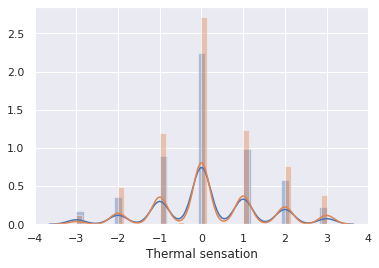

In [ ]:
sns.distplot(OH_data_natural_ventilaton)
sns.distplot(OH_data_not_natural_ventilaton)

### Here's an interesting visualization

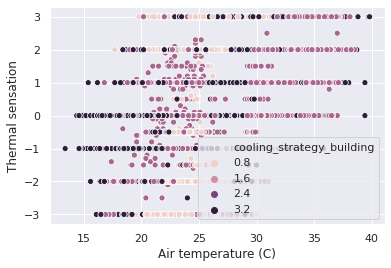

In [ ]:
sns.scatterplot(x="Air temperature (C)", y="Thermal sensation", data=OH_data, hue='cooling_strategy_building')

### The follwoing code, just shows an example of what kind of explorations are possible. Here we see that Season alone is not enough to determine people's thermal preference. It's important to go over different combinations of variables to find patterns.

In [ ]:
OH_data[['Season_Autumn',
       'Season_Spring', 'Season_Summer', 'Season_Winter']]

,Season_Autumn,Season_Spring,Season_Summer,Season_Winter
74,0.0,0.0,1.0,0.0
75,0.0,0.0,1.0,0.0
76,0.0,0.0,1.0,0.0
77,0.0,0.0,1.0,0.0
78,0.0,0.0,1.0,0.0
...,...,...,...,...
73160,0.0,0.0,0.0,1.0
73161,0.0,0.0,0.0,1.0
73162,0.0,0.0,0.0,1.0
73163,0.0,0.0,0.0,1.0


In [ ]:
OH_data_summer = OH_data[OH_data.Season_Summer == 1]
OH_data_winter = OH_data[OH_data.Season_Winter == 1]
OH_data_spring = OH_data[OH_data.Season_Spring == 1]
OH_data_autumn = OH_data[OH_data.Season_Autumn == 1]

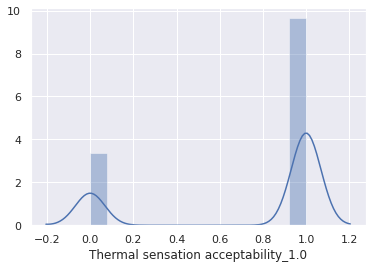

In [ ]:
sns.distplot(OH_data_summer['Thermal sensation acceptability_1.0'])

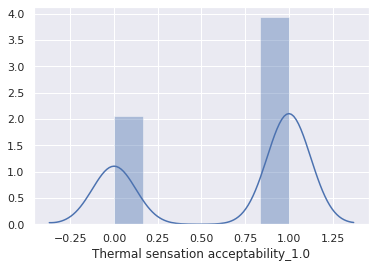

In [ ]:
sns.distplot(OH_data_autumn['Thermal sensation acceptability_1.0'])

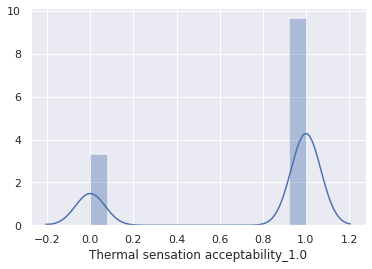

In [ ]:
sns.distplot(OH_data_winter['Thermal sensation acceptability_1.0'])

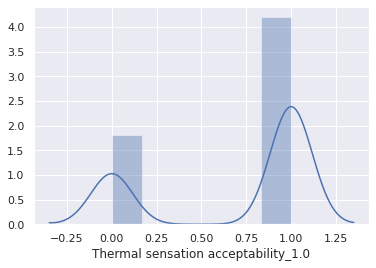

In [ ]:
sns.distplot(OH_data_spring['Thermal sensation acceptability_1.0'])

### From the results, we have higher completeness than homogeneity. This means that our clusters are less homogenous than the class distribution of the clusters. The V-measure is low which means this model does not do a good job at completing the picture!

### For now this seems interesting, we need a better model than k-means clustering. Hopefully you can make something great too.

### If you enjoyed this notebook, feel free to give a rating. Otherwise, have fun exploring and experimenting!

# <span style='color:#008080'>Citation</span>

- Bhusal, Mahesh. “Aluminum Sliding Windows.” Indiamart.com, www.indiamart.com/proddetail/aluminum-sliding-windows-14397881748.html.
- “Passive Ventilation in Buildings: Better Indoor Climate: Low Costs.” WindowMaster, www.windowmaster.com/solutions/natural-ventilation/passive-ventilation.
- Mixed-Mode Buildings, Berkley, cbe.berkeley.edu/mixedmode/index.html.
- “Mechanical Ventilation in Buildings – What You Need to Know.” TheGreenAge, 1 Aug. 2019, www.thegreenage.co.uk/mechanical-ventilation-in-buildings-what-you-need-to-know/.
- About the author(s)                                                Stephanie Balgeman is a consultant in McKinsey’s San Francisco office. “Can HVAC Systems Help Prevent Transmission of COVID-19?” McKinsey &amp; Company, McKinsey &amp; Company, 10 July 2020, www.mckinsey.com/industries/advanced-electronics/our-insights/can-hvac-systems-help-prevent-transmission-of-covid-19.
- Winston, Keisha. “How an HVAC System Works: Hvac System, Commercial Hvac, Hvac Maintenance.” Pinterest, www.pinterest.es/pin/451626668873126729/.
- “Ductwork.” Ductwork - Designing Buildings Wiki, 15 Apr. 2020, www.designingbuildings.co.uk/wiki/Ductwork.
- Clinton, Marcus, and Brett Boardman. “Research &amp; Education Architecture.” Architecture &amp; Design, www.architectureanddesign.com.au/projects/education-research/wmk-architecture-adopt-innovative-mixed-mode-venti.
- Wood, Angela. “Map of World Zones and Degrees. SC.5.E.7.6: Describe Characteristics (Temperature and Precipitation) of Diffe...: Climate Zones, Physical Geography, Weather for Kids.” Pinterest, www.pinterest.com/pin/79376012157200933/.